In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sub3_1=pd.read_csv("Subject03_1_data.txt")
sub3_2=pd.read_csv("Subject03_2_data.txt")
sub3_1['type']=0
sub3_2['type']=1
df = sub3_1.append(sub3_2, ignore_index=True)
df


C:\Users\nithi\AppData\Local\Temp\ipykernel_9892\4185602297.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = sub3_1.append(sub3_2, ignore_index=True)


,Time,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,type
0,0.000,5.887305,4.622506,3.469505,6.424502,3.265513,6.519703,4.432888,6.950908,2.420006,...,6.881919,5.479850,8.158451,5.766818,4.047638,4.958639,3.885316,0.292566,0.004968,0
1,0.002,4.211407,3.450633,1.687325,4.214412,0.857720,3.444344,1.866099,6.214707,-0.227120,...,3.171255,6.103723,6.834196,6.007683,2.485552,2.044336,3.206793,-0.450583,0.004224,0
2,0.004,2.132053,1.888632,-0.575346,1.537770,-2.082931,-0.264319,-1.257538,5.569186,-3.382917,...,-1.190836,7.378206,5.254521,6.990570,0.500997,-1.298541,2.927131,-1.157969,0.003285,0
3,0.006,-0.079719,0.080940,-3.050597,-1.227356,-5.150830,-4.044947,-4.501655,5.243352,-6.567634,...,-5.506201,9.435205,3.627692,9.004903,-1.680511,-4.512846,3.387885,-1.606300,0.002346,0
4,0.008,-2.076313,-1.765468,-5.377333,-3.650612,-7.850899,-7.235453,-7.347603,5.412417,-9.252188,...,-9.024460,12.276501,2.160009,12.188600,-3.759784,-7.031228,4.804533,-1.601067,0.001652,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121995,61.990,-0.000116,-0.000229,0.000256,-0.000794,-0.000605,0.000353,0.000951,-0.000353,0.000493,...,0.000327,-0.000666,0.001213,-0.000861,0.000136,-0.000116,-0.000994,-0.000219,0.000003,1
121996,61.992,-0.000116,-0.000229,0.000256,-0.000794,-0.000605,0.000353,0.000951,-0.000353,0.000493,...,0.000327,-0.000666,0.001213,-0.000861,0.000136,-0.000116,-0.000994,-0.000219,0.000003,1
121997,61.994,-0.000116,-0.000229,0.000256,-0.000794,-0.000605,0.000353,0.000951,-0.000353,0.000493,...,0.000327,-0.000666,0.001213,-0.000861,0.000136,-0.000116,-0.000994,-0.000219,0.000003,1
121998,61.996,-0.000116,-0.000229,0.000256,-0.000794,-0.000605,0.000353,0.000951,-0.000353,0.000493,...,0.000327,-0.000666,0.001213,-0.000861,0.000136,-0.000116,-0.000994,-0.000219,0.000003,1


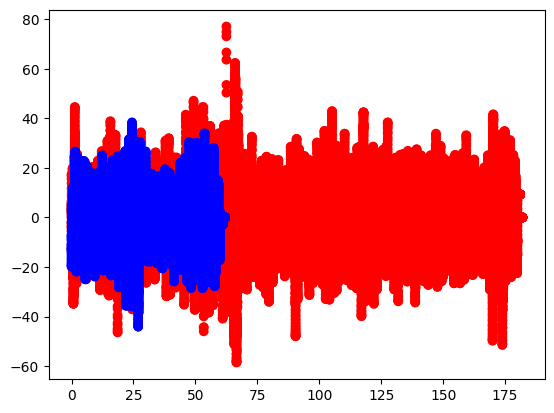

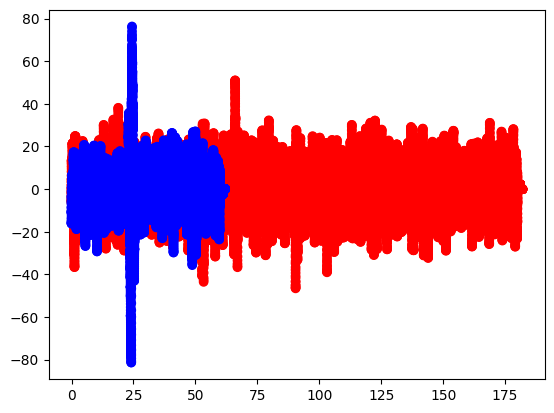

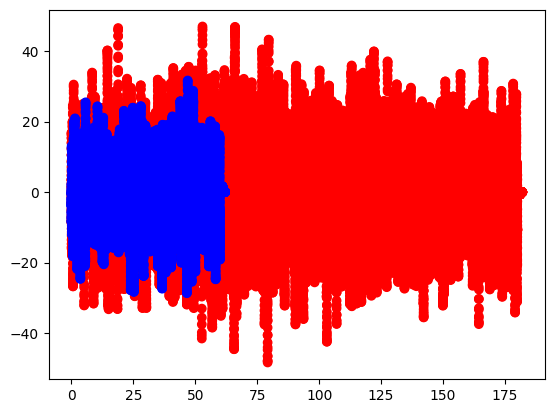

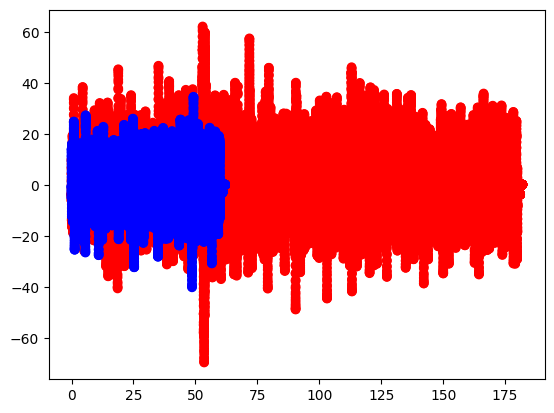

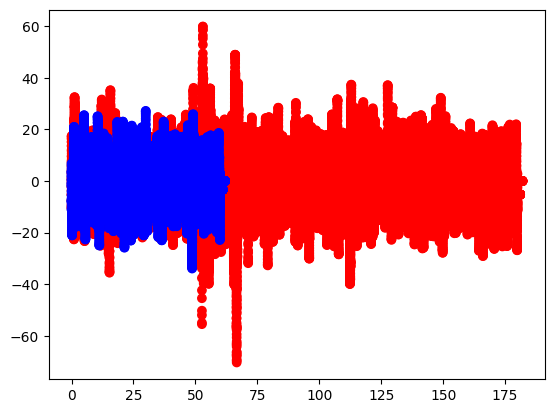

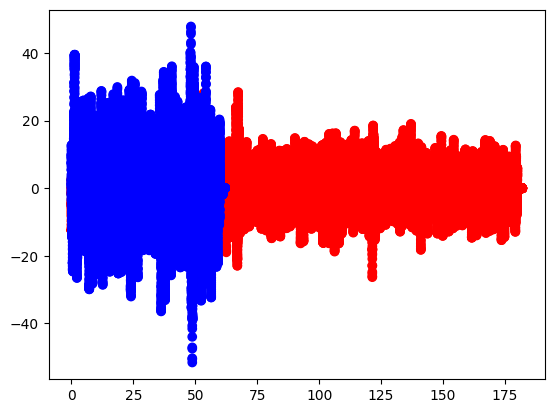

In [20]:
#before fft

def col(type):
  colarr=[]
  for i in range(len(type)):
    if type[i]==0:
      colarr.append('red')
    else:
      colarr.append('blue')
  return colarr
plt.scatter(df['Time'],df['1'],c=col(df['type']))
plt.show()
plt.scatter(df['Time'],df['2'],c=col(df['type']))
plt.show()
plt.scatter(df['Time'],df['3'],c=col(df['type']))
plt.show()
plt.scatter(df['Time'],df['4'],c=col(df['type']))
plt.show()
plt.scatter(df['Time'],df['5'],c=col(df['type']))
plt.show()
plt.scatter(df['Time'],df['20'],c=col(df['type']))
plt.show()

In [21]:
#after fft
def fft(input_list):
    fft_result = np.fft.fft(input_list)
    return fft_result.tolist()

fft(df.iloc[0])
print(len(df[df['type']==0]))
print(len(df[df['type']==1]))


91000
31000


0        0.292566
1       -0.450583
2       -1.157969
3       -1.606300
4       -1.601067
           ...   
90995   -0.000507
90996   -0.000507
90997   -0.000507
90998   -0.000507
90999   -0.000507
Name: 20, Length: 91000, dtype: float64


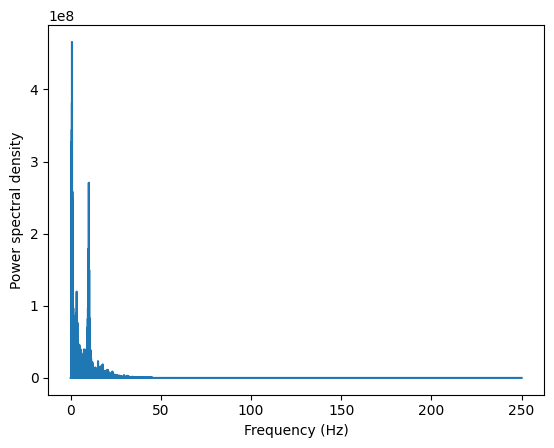

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load the EEG data from a file or generate some simulated data
eeg_data = df['20'][:91000]
print(eeg_data)

# Remove any artifacts or noise from the EEG signal using pre-processing techniques

# Define a window function
window = np.hamming(len(eeg_data))

# Apply the window function to the EEG data
windowed_data = eeg_data * window

# Perform the Fourier Transform
fft_data = np.fft.fft(windowed_data)

# Calculate the power spectrum
power_spectrum = np.abs(fft_data)**2

# Define the frequency range of the EEG signal
sampling_rate =  500 # in Hz
num_samples= 91000
freq_bins = np.linspace(0, sampling_rate / 2, num_samples // 2 + 1)

# Plot the power spectrum as frequency bins
plt.plot(freq_bins, power_spectrum[:len(freq_bins)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.show()

91000     8.744970
91001     7.465334
91002     5.601978
91003     3.353519
91004     1.080801
            ...   
121995   -0.000219
121996   -0.000219
121997   -0.000219
121998   -0.000219
121999   -0.000219
Name: 20, Length: 31000, dtype: float64


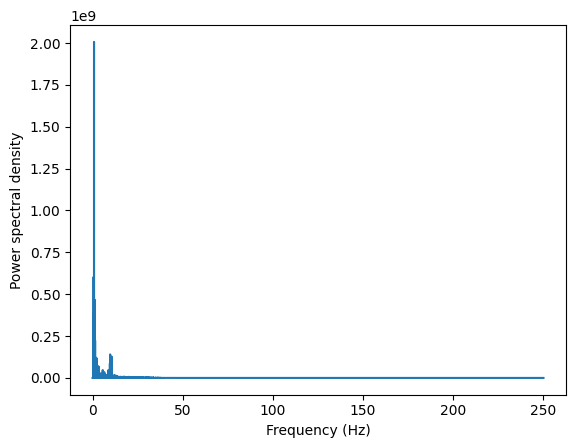

In [23]:
# Load the EEG data from a file or generate some simulated data
eeg_data = df['20'][91000:]
print(eeg_data)

# Remove any artifacts or noise from the EEG signal using pre-processing techniques

# Define a window function
window = np.hamming(len(eeg_data))

# Apply the window function to the EEG data
windowed_data = eeg_data * window

# Perform the Fourier Transform
fft_data = np.fft.fft(windowed_data)

# Calculate the power spectrum
power_spectrum = np.abs(fft_data)**2

# Define the frequency range of the EEG signal
sampling_rate =  500 # in Hz
num_samples= 31000
freq_bins = np.linspace(0, sampling_rate / 2, num_samples // 2 + 1)

# Plot the power spectrum as frequency bins
plt.plot(freq_bins, power_spectrum[:len(freq_bins)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.show()